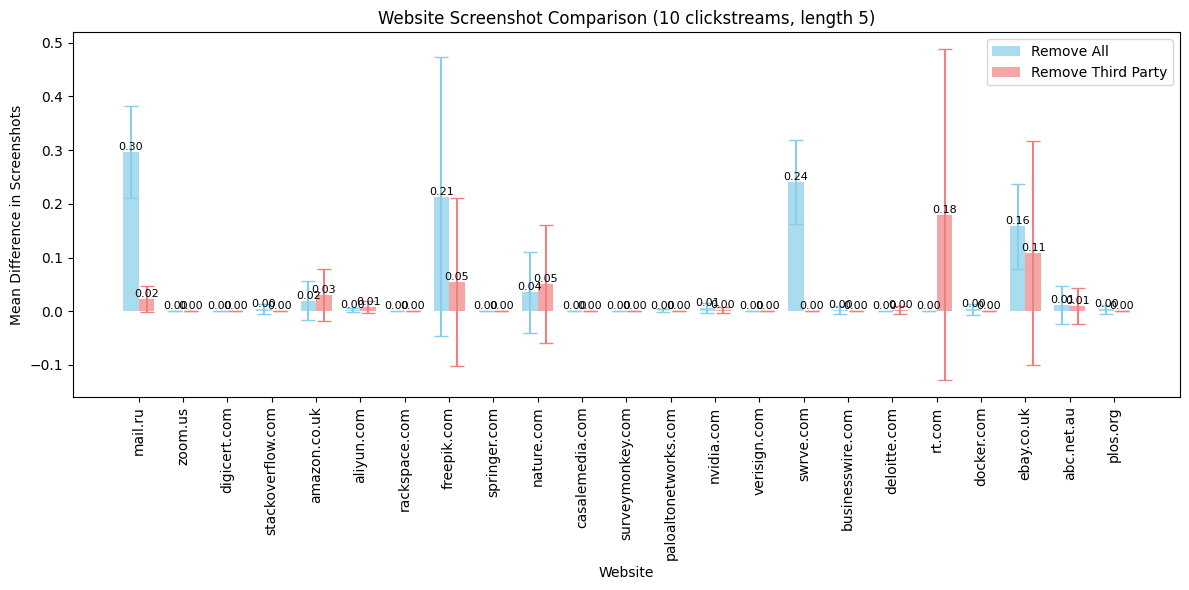

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV files into Pandas DataFrames
remove_all = pd.read_csv("remove-all.csv")
remove_third_party = pd.read_csv("remove-third-party.csv")

# Merge the two DataFrames using an inner join on the 'website' column
merged_data = pd.merge(remove_all, remove_third_party, on="website", suffixes=("_remove_all", "_remove_third_party"))

# Set the x-axis labels to be the websites
websites = merged_data["website"]
x = np.arange(len(websites))  # Use numpy.arange for better control

# Set the data for the first CSV (remove-all)
mean_diff_remove_all = merged_data["mean diff_remove_all"]
stdev_remove_all = merged_data["stdev_remove_all"]

# Set the data for the second CSV (remove-third-party)
mean_diff_remove_third_party = merged_data["mean diff_remove_third_party"]
stdev_remove_third_party = merged_data["stdev_remove_third_party"]

# Create the figure and axes for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Define a color for the bars and error bars
bar_color = "skyblue"

# Width of the bars
width = 0.35

# Plot the data for the first CSV with error bars
bars1 = ax.bar(x - width/2, mean_diff_remove_all, width=width, label="Remove All", color=bar_color, alpha=0.7)

# Plot the data for the second CSV with error bars
bars2 = ax.bar(x + width/2, mean_diff_remove_third_party, width=width, label="Remove Third Party", color="lightcoral", alpha=0.7)

# Set the x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(websites, rotation=90)

# Set labels and title
ax.set_xlabel("Website")
ax.set_ylabel("Mean Difference in Screenshots")
ax.set_title("Website Screenshot Comparison (10 clickstreams, length 5)")

# Add a legend
ax.legend()

# Customize the error bars to match the bar color and add horizontal lines
error_kw = {'capsize': 5, 'ecolor': bar_color, 'color': bar_color}
ax.bar(x - width/2, mean_diff_remove_all, width=width, yerr=stdev_remove_all, alpha=0, error_kw=error_kw)

error_kw = {'capsize': 5, 'ecolor': 'lightcoral', 'color': 'lightcoral'}
ax.bar(x + width/2, mean_diff_remove_third_party, width=width, yerr=stdev_remove_third_party, alpha=0, error_kw=error_kw)

# Add text labels for the values at the top of each bar
for bar1, bar2 in zip(bars1, bars2):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax.annotate(f"{height1:.2f}", (bar1.get_x() + bar1.get_width() / 2, height1),
                ha="center", va="bottom", fontsize=8)
    ax.annotate(f"{height2:.2f}", (bar2.get_x() + bar2.get_width() / 2, height2),
                ha="center", va="bottom", fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()


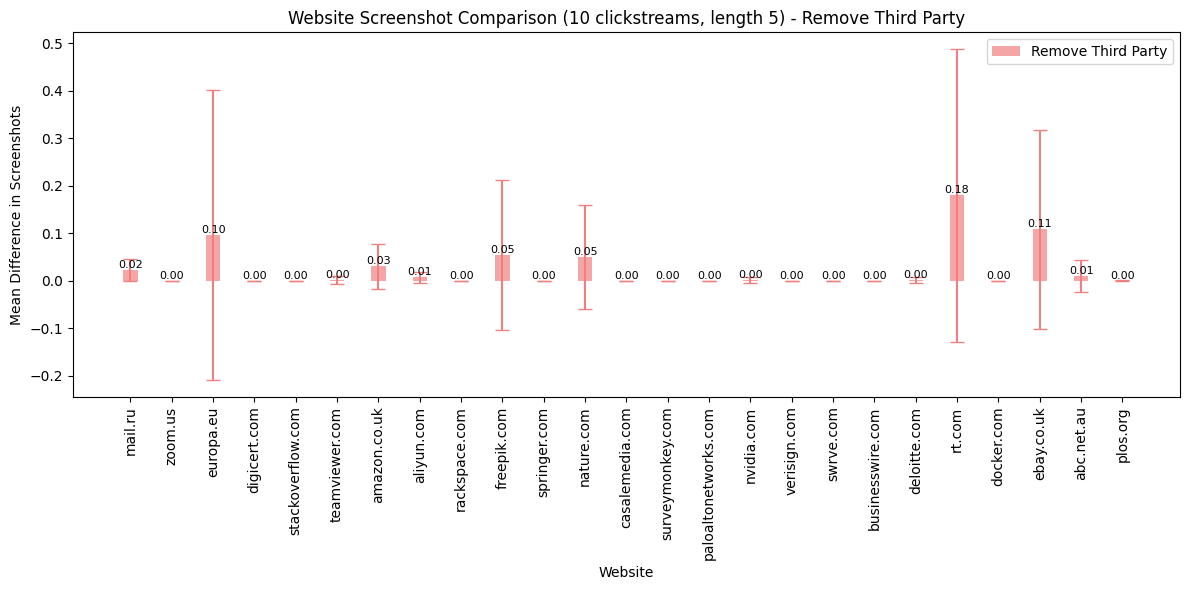

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a Pandas DataFrame
remove_third_party = pd.read_csv("remove-third-party.csv")

# Set the x-axis labels to be the websites
websites = remove_third_party["website"]
x = np.arange(len(websites))  # Use numpy.arange for better control

# Set the data for the "Remove Third Party" CSV
mean_diff_remove_third_party = remove_third_party["mean diff"]
stdev_remove_third_party = remove_third_party["stdev"]

# Create the figure and axes for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Define a color for the bars and error bars
bar_color = "lightcoral"

# Width of the bars
width = 0.35

# Plot the data for the "Remove Third Party" CSV with error bars
bars = ax.bar(x, mean_diff_remove_third_party, width=width, label="Remove Third Party", color=bar_color, alpha=0.7)

# Set the x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(websites, rotation=90)

# Set labels and title
ax.set_xlabel("Website")
ax.set_ylabel("Mean Difference in Screenshots")
ax.set_title("Website Screenshot Comparison (10 clickstreams, length 5) - Remove Third Party")

# Add a legend
ax.legend()

# Customize the error bars to match the bar color and add horizontal lines
error_kw = {'capsize': 5, 'ecolor': bar_color, 'color': bar_color}
ax.bar(x, mean_diff_remove_third_party, width=width, yerr=stdev_remove_third_party, alpha=0, error_kw=error_kw)

# Add text labels for the values at the top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{height:.2f}", (bar.get_x() + bar.get_width() / 2, height),
                ha="center", va="bottom", fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()
